<a href="https://colab.research.google.com/github/mevangelista-alvarado/neural_networks/blob/main/RedNeuronalMulticapa_Ejemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

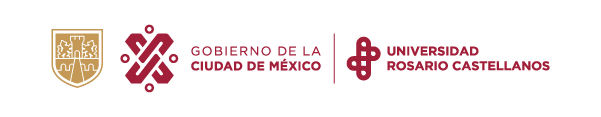

## Introducción

Mostramos un ejemplo simple de una red neuronal multicapa en Python puro, donde se realiza una operación de regresión lineal.  

## Implementación en Python

Importamos los módulos necesarios

In [3]:
import numpy as np

Definimos los datos de entrenamiento, donde $x$ son los datos de entradas e $y$ son las etiquetas.

In [4]:
# Datos de entrenamiento
X = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])
y = np.array([[1], [1], [0], [0]])

Definición de la arquitectura de la red

In [6]:
input_size = 2
hidden_size = 2
output_size = 1

La red tiene una capa de entrada con dos neuronas (que corresponde a las dos características de entrada), una capa oculta con dos neuronas y una capa de salida con una neurona.

Inicialización de pesos

In [7]:
weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

Los pesos de las conexiones entre las neuronas se inicializan de manera aleatoria.

Definición de la función de activación

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Está función puede ser cambiada por la función ReLU, por ejemplo.

Hiperparámetros


In [9]:
learning_rate = 0.1
epochs = 10000

Se definen la tasa de aprendizaje y el número de épocas para el entrenamiento.

Entrenamiento

In [10]:
for epoch in range(epochs):
    # Capa oculta
    input_hidden = np.dot(X, weights_input_hidden)
    output_hidden = sigmoid(input_hidden)

    # Capa de salida
    input_output = np.dot(output_hidden, weights_hidden_output)
    output = sigmoid(input_output)

    # Cálculo del error
    error = y - output

    # Retropropagación y actualización de pesos
    d_output = error * (output * (1 - output))
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * (output_hidden * (1 - output_hidden))

    weights_hidden_output += output_hidden.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden) * learning_rate

Predicciones

In [ ]:
# Predicciones
predictions = output

print("Resultados finales:")
for i in range(0, len(X)):
  print(f"Input: {X[i]}, Target: {y[i]}, Predictions {predictions[i]}")

Una vez que la red está entrenada, se utilizan las entradas para hacer predicciones y se muestra el resultado.



Calcular el error cuadrático medio (MSE)

In [ ]:
mse = ((y - predictions) ** 2).mean()
print(f"Error Cuadrático Medio (MSE): {mse}")